In [1]:
from Model.GeoGans import GAN2D_MPS, WGAN2D_MPS, AlphaGAN_MPS, CycleGAN_MPS
from Model.Utils import PlotHistory, PlotDataAE, Save_Model
from Model.Utils import load_numpy, convert_to_tfrecords, MPS_Generator
from keras.optimizers import RMSprop,Adam
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS40x200'
path_npy = '../../ModelosDeFacies/Model2FaciesLarge/DataSet.npy'
batch_size = 32

In [3]:
if load_tfrecords:    
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr,x_train,x_test)
        gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 35000)
        
    else:
        try:
            gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 35000)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
    x_train = gen_train.get_numpy_batch().astype('float32')
else:
    x_train, _ = load_numpy(path_npy,random_state=0,split_data=0.30)
x_train = x_train*2-1

# Training GAN models 

In [4]:
_, n_rows, n_cols, n_chns = x_train.shape
# path_weights = os.path.join(path_tfr, 'w40x200_GAN.hdf5')
num_epochs = 25

## 1.  CycleGAN Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dis_pca_input (InputLayer)   (None, 40, 200, 1)        0         
_________________________________________________________________
dis_pca_1_conv2D (Conv2D)    (None, 20, 100, 32)       544       
_________________________________________________________________
dis_pca_1_leaky_relu (LeakyR (None, 20, 100, 32)       0         
_________________________________________________________________
dis_pca_2_conv2D (Conv2D)    (None, 10, 50, 64)        32832     
_________________________________________________________________
dis_pca_2_bn (BatchNormaliza (None, 10, 50, 64)        256       
_________________________________________________________________
dis_pca_2_leaky_relu (LeakyR (None, 10, 50, 64)        0         
_________________________________________________________________
dis_pca_3_conv2D (Conv2D)    (None, 5, 25, 128)        131200    
__________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
gen_bin__input (InputLayer)     (None, 40, 200, 1)   0                                            
__________________________________________________________________________________________________
gen_bin_e1_conv2D (Conv2D)      (None, 40, 200, 32)  1600        gen_bin__input[0][0]             
__________________________________________________________________________________________________
gen_bin_e1_leaky_relu (LeakyReL (None, 40, 200, 32)  0           gen_bin_e1_conv2D[0][0]          
__________________________________________________________________________________________________
gen_bin_e2_conv2D (Conv2D)      (None, 20, 100, 64)  32832       gen_bin_e1_leaky_relu[0][0]      
__________________________________________________________________________________________________
gen_bin_e2

Building pca model ...


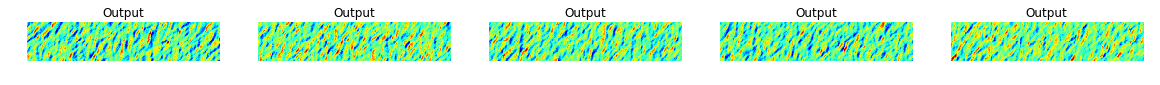

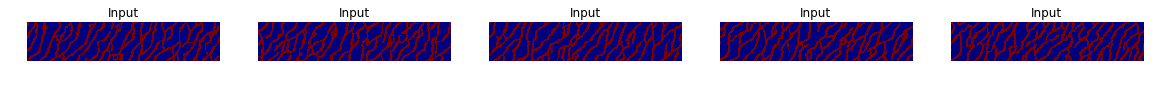

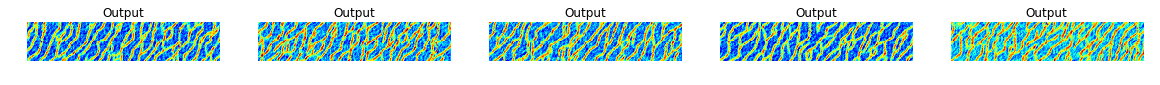

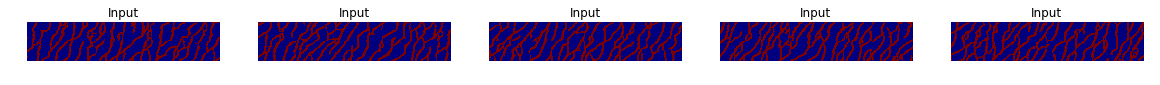

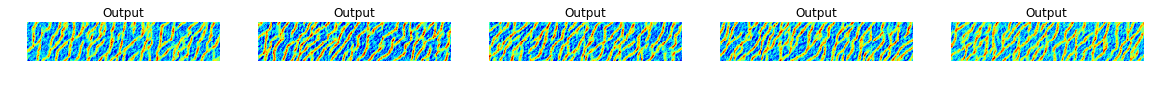

Initializing GANs models variables ...
Starting GANs training ...


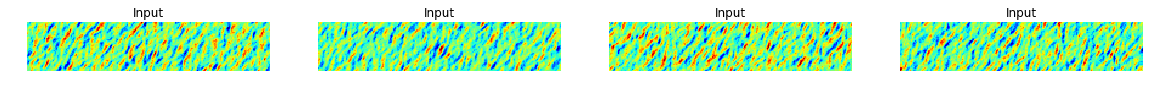

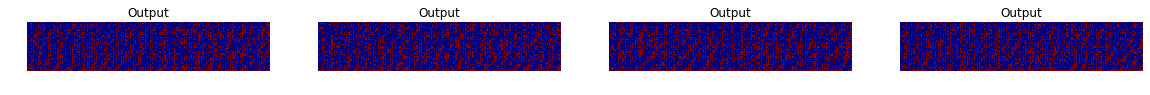

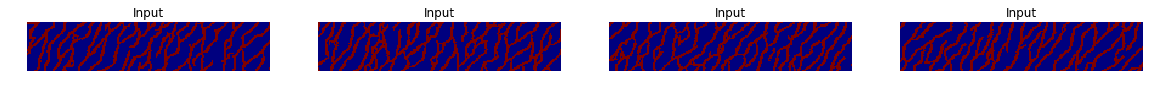

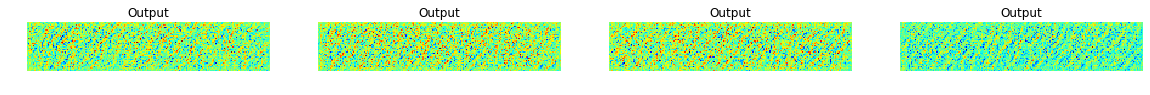

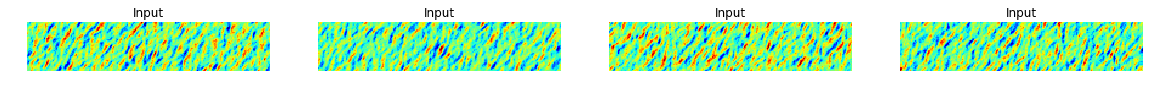

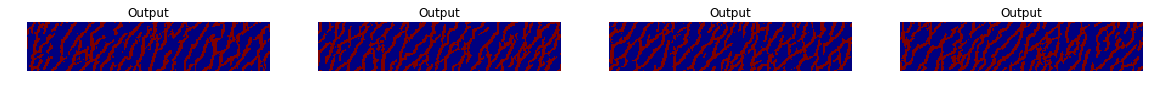

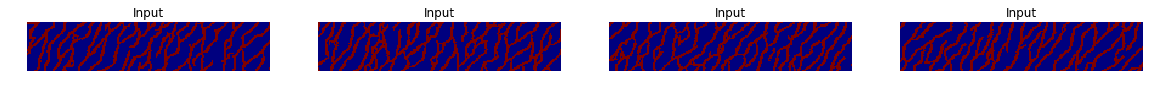

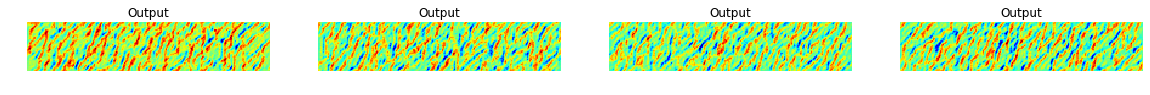

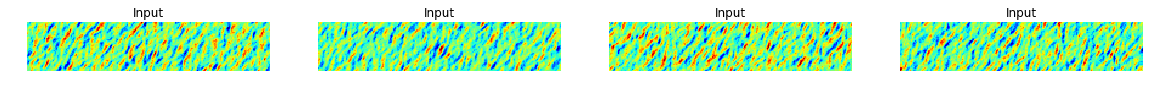

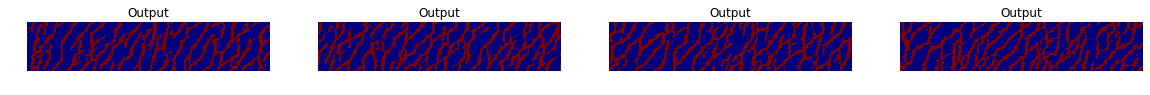

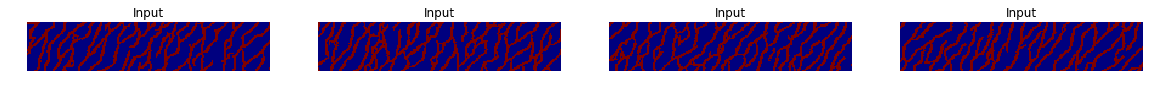

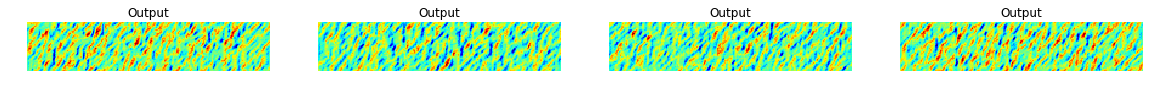

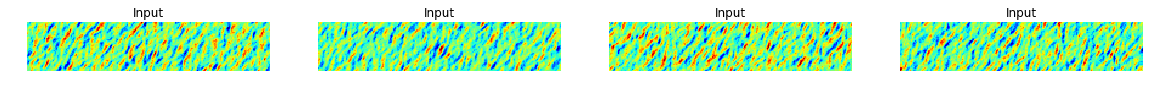

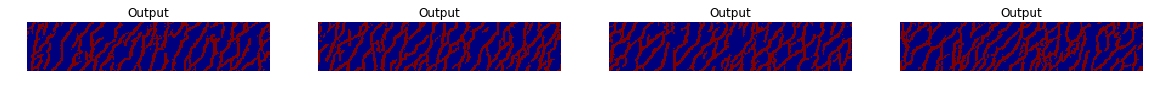

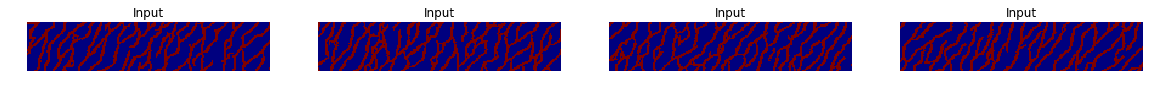

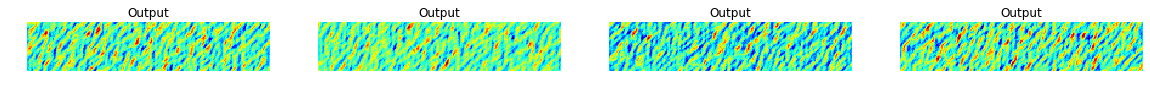

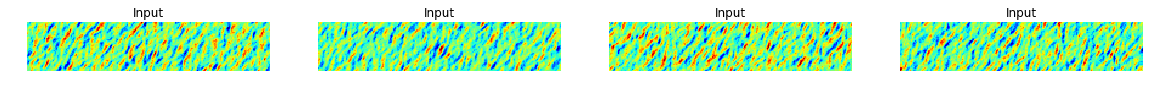

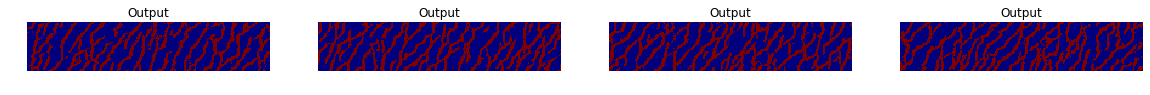

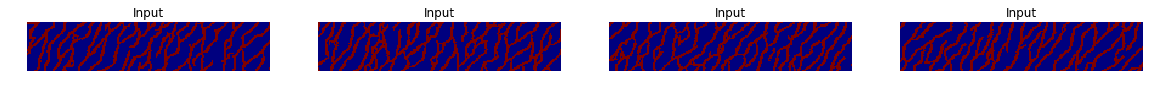

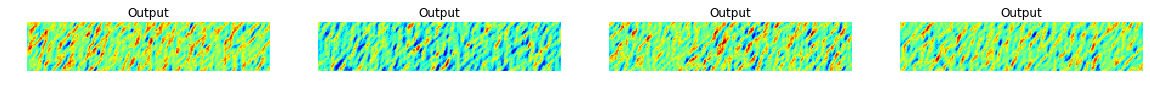

Epoch: [ 1] [2500/2500] time: 615.9330, d_loss_pca: 0.68792415, d_loss_bin: 0.64864999, g_loss_pca: 1.30602407, g_loss_bin: 1.43825555
Cycle losses --> 0.16697198 0.028260931
Accuracy:   0.9266338
Epoch: [ 2] [2500/2500] time: 1228.1490, d_loss_pca: 0.70523018, d_loss_bin: 0.64849055, g_loss_pca: 1.22221410, g_loss_bin: 1.43657839
Cycle losses --> 0.1720279 0.012000091
Accuracy:   0.9262671


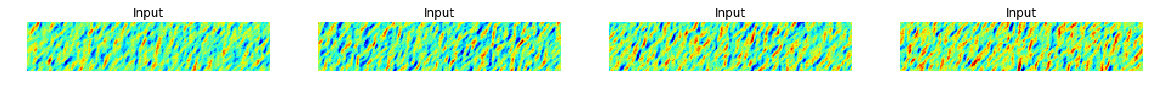

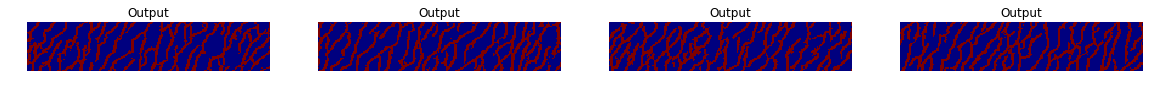

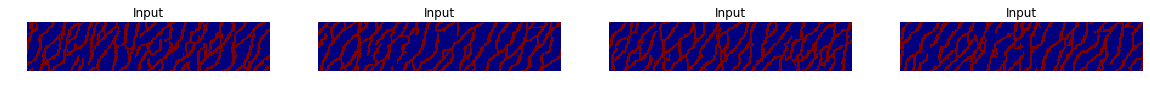

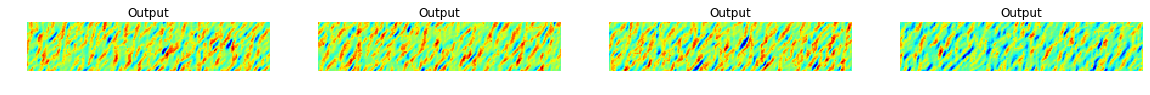

Epoch: [ 3] [2500/2500] time: 1844.7709, d_loss_pca: 0.69586039, d_loss_bin: 0.62311554, g_loss_pca: 1.24346316, g_loss_bin: 1.52181327
Cycle losses --> 0.18057656 0.013639111
Accuracy:   0.92305684
Epoch: [ 4] [2500/2500] time: 2455.3241, d_loss_pca: 0.68685490, d_loss_bin: 0.57941389, g_loss_pca: 1.26287961, g_loss_bin: 1.70114028
Cycle losses --> 0.18732111 0.017354608
Accuracy:   0.9228336


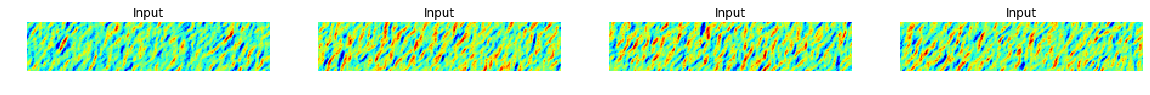

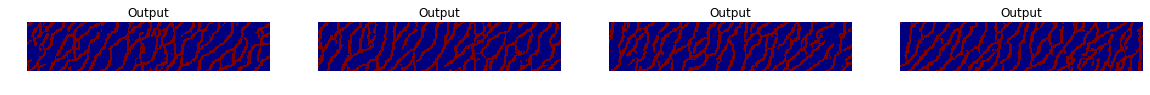

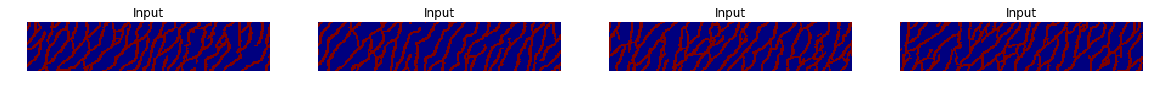

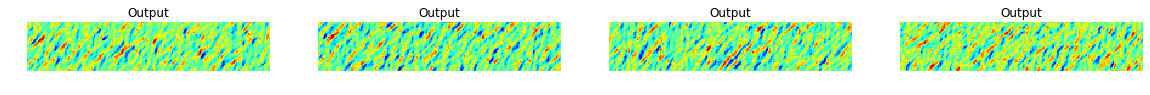

Epoch: [ 5] [2500/2500] time: 3070.9941, d_loss_pca: 0.67822421, d_loss_bin: 0.47895238, g_loss_pca: 1.27590561, g_loss_bin: 2.16812038
Cycle losses --> 0.1951403 0.026989486
Accuracy:   0.92094046
Epoch: [ 6] [2500/2500] time: 3681.1916, d_loss_pca: 0.66953474, d_loss_bin: 0.34216845, g_loss_pca: 1.29586351, g_loss_bin: 2.99533367
Cycle losses --> 0.198886 0.03489596
Accuracy:   0.9217035


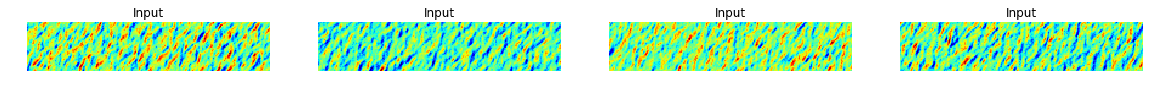

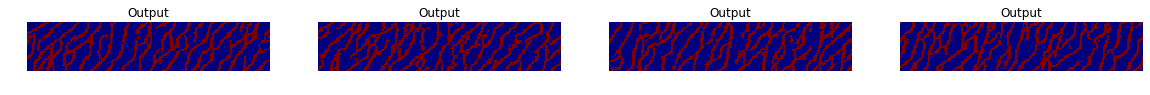

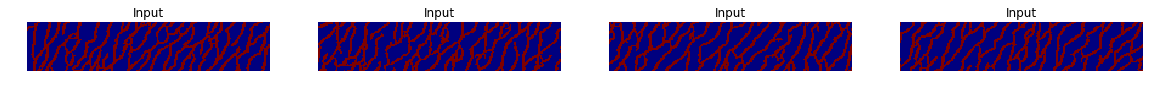

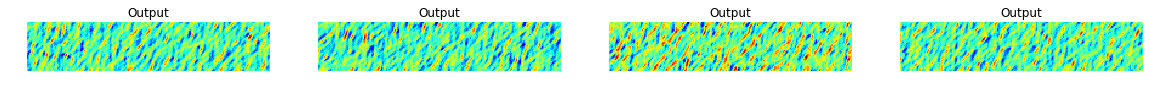

Epoch: [ 7] [2500/2500] time: 4295.9508, d_loss_pca: 0.66337937, d_loss_bin: 0.27527350, g_loss_pca: 1.30666995, g_loss_bin: 3.48320699
Cycle losses --> 0.20010298 0.04050037
Accuracy:   0.9114845
Epoch: [ 8] [2500/2500] time: 4907.0109, d_loss_pca: 0.65642542, d_loss_bin: 0.24357195, g_loss_pca: 1.32253432, g_loss_bin: 3.76425934
Cycle losses --> 0.2010048 0.04445658
Accuracy:   0.9159885


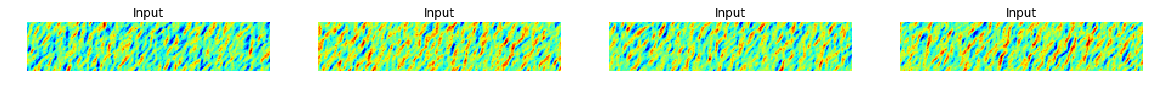

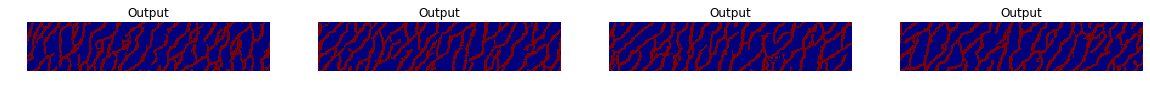

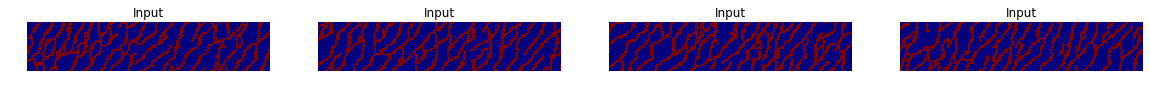

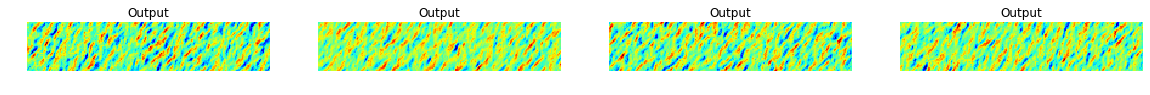

Epoch: [ 9] [2500/2500] time: 5524.2117, d_loss_pca: 0.64388496, d_loss_bin: 0.21190025, g_loss_pca: 1.34714484, g_loss_bin: 4.04194355
Cycle losses --> 0.20100656 0.047670167
Accuracy:   0.9178756
Epoch: [10] [2500/2500] time: 6135.1815, d_loss_pca: 0.63486999, d_loss_bin: 0.19774343, g_loss_pca: 1.35772729, g_loss_bin: 4.24938822
Cycle losses --> 0.20186687 0.051703773
Accuracy:   0.90476483


In [ ]:
model = CycleGAN_MPS(summary = True, input_shape = (40, 200, 2),batch_size=2,epsilon=0.5)
model.train(x_train , epochs=num_epochs)